In [ ]:
!pip install torch torchvision matplotlib numpy


Design and implement Deep Convolutional GAN to generate images of faces/digits from a
set of given images


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
subset = Subset(mnist, range(1000))  # Use only 1000 samples

dataloader = DataLoader(subset, batch_size=64, shuffle=True)


In [4]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 128, 7, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128*7*7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [5]:
latent_dim = 100
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [9]:
def show_images(imgs, title):
    imgs = imgs.detach().cpu()
    grid = make_grid(imgs, nrow=8, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.axis("off")
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()



Epoch [1/50] | Loss_D: 6.8192 | Loss_G: 58.4944
Epoch [2/50] | Loss_D: 12.6002 | Loss_G: 35.3473
Epoch [3/50] | Loss_D: 11.5513 | Loss_G: 34.9594
Epoch [4/50] | Loss_D: 12.6877 | Loss_G: 32.6841
Epoch [5/50] | Loss_D: 13.6361 | Loss_G: 25.2091
Epoch [6/50] | Loss_D: 11.0170 | Loss_G: 24.2075
Epoch [7/50] | Loss_D: 12.0923 | Loss_G: 24.0327
Epoch [8/50] | Loss_D: 13.1577 | Loss_G: 23.9155
Epoch [9/50] | Loss_D: 12.9084 | Loss_G: 22.5493
Epoch [10/50] | Loss_D: 11.6985 | Loss_G: 22.1659


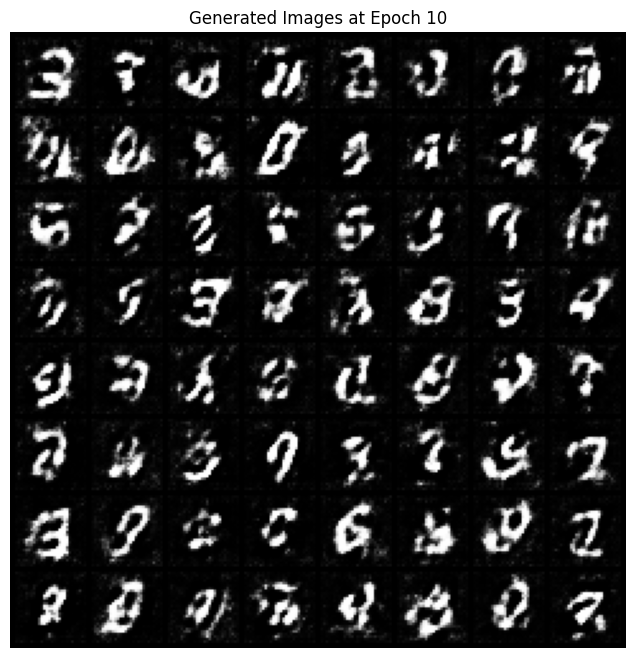

Epoch [11/50] | Loss_D: 13.3733 | Loss_G: 22.7564
Epoch [12/50] | Loss_D: 11.8543 | Loss_G: 22.8482
Epoch [13/50] | Loss_D: 11.2487 | Loss_G: 22.6569
Epoch [14/50] | Loss_D: 12.2672 | Loss_G: 23.7827
Epoch [15/50] | Loss_D: 11.6539 | Loss_G: 23.3970
Epoch [16/50] | Loss_D: 10.9780 | Loss_G: 23.3006
Epoch [17/50] | Loss_D: 11.7184 | Loss_G: 24.8783
Epoch [18/50] | Loss_D: 10.5834 | Loss_G: 24.1669
Epoch [19/50] | Loss_D: 10.4494 | Loss_G: 25.1523
Epoch [20/50] | Loss_D: 9.8552 | Loss_G: 25.8251


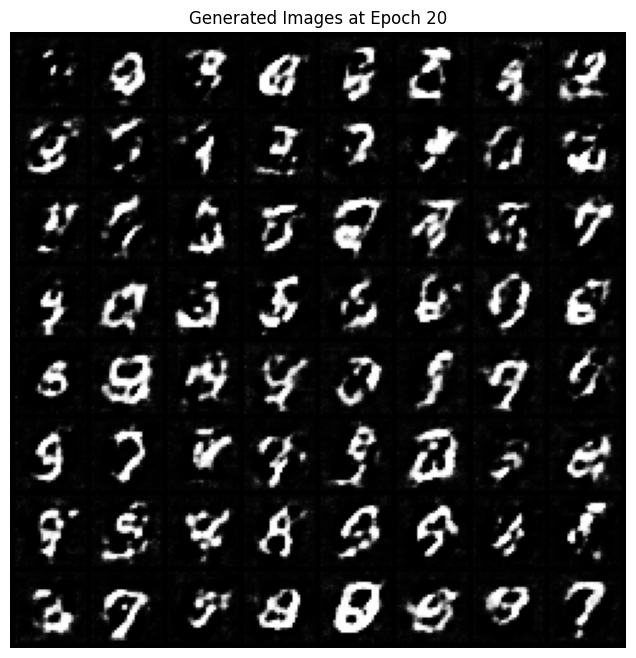

Epoch [21/50] | Loss_D: 10.0346 | Loss_G: 26.2932
Epoch [22/50] | Loss_D: 10.1418 | Loss_G: 26.2675
Epoch [23/50] | Loss_D: 9.5174 | Loss_G: 26.8505
Epoch [24/50] | Loss_D: 8.6216 | Loss_G: 28.0408
Epoch [25/50] | Loss_D: 9.8223 | Loss_G: 26.7748
Epoch [26/50] | Loss_D: 9.2672 | Loss_G: 29.1789
Epoch [27/50] | Loss_D: 8.2674 | Loss_G: 27.5789
Epoch [28/50] | Loss_D: 9.0449 | Loss_G: 29.6787
Epoch [29/50] | Loss_D: 8.2221 | Loss_G: 29.4935
Epoch [30/50] | Loss_D: 8.9281 | Loss_G: 30.1045


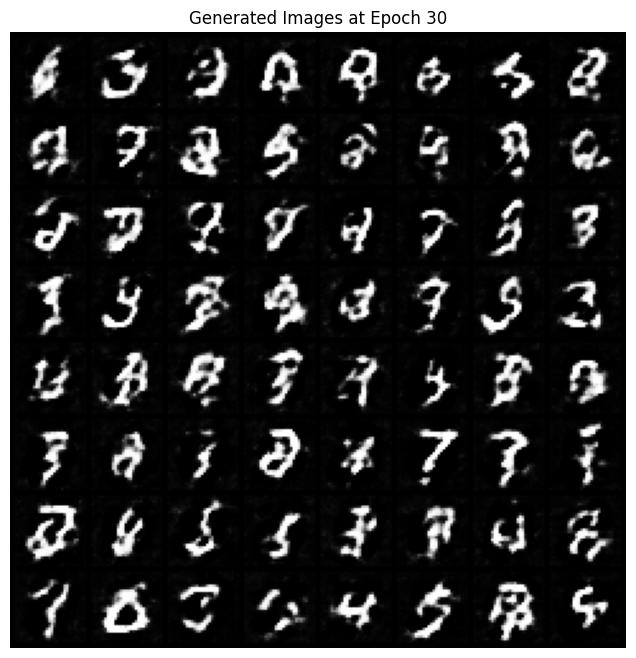

Epoch [31/50] | Loss_D: 8.1339 | Loss_G: 30.6136
Epoch [32/50] | Loss_D: 7.7337 | Loss_G: 31.4278
Epoch [33/50] | Loss_D: 8.7090 | Loss_G: 30.5624
Epoch [34/50] | Loss_D: 7.4285 | Loss_G: 30.4977
Epoch [35/50] | Loss_D: 7.8919 | Loss_G: 32.1080
Epoch [36/50] | Loss_D: 7.9812 | Loss_G: 31.3078
Epoch [37/50] | Loss_D: 6.8915 | Loss_G: 32.6271
Epoch [38/50] | Loss_D: 7.3024 | Loss_G: 32.7989
Epoch [39/50] | Loss_D: 9.8596 | Loss_G: 32.5316
Epoch [40/50] | Loss_D: 7.8890 | Loss_G: 30.5827


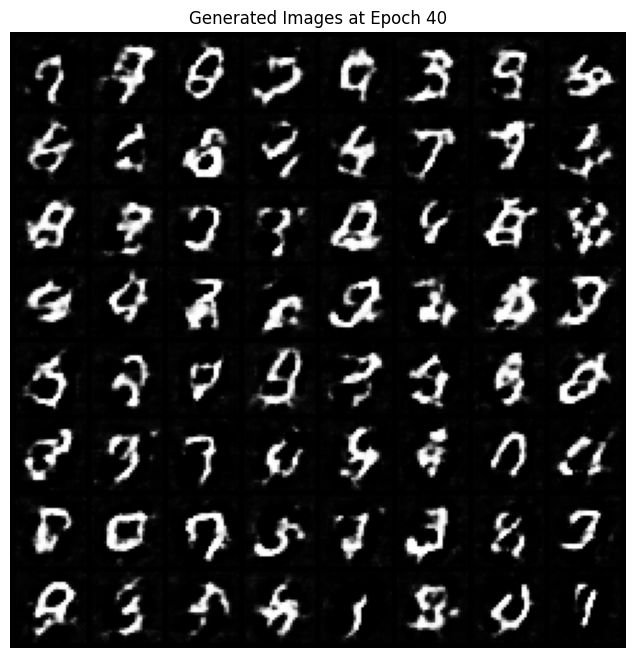

Epoch [41/50] | Loss_D: 6.7699 | Loss_G: 33.8375
Epoch [42/50] | Loss_D: 7.1297 | Loss_G: 31.5931
Epoch [43/50] | Loss_D: 8.7913 | Loss_G: 32.9198
Epoch [44/50] | Loss_D: 7.2384 | Loss_G: 34.0365
Epoch [45/50] | Loss_D: 7.7601 | Loss_G: 32.1177
Epoch [46/50] | Loss_D: 6.4998 | Loss_G: 33.9353
Epoch [47/50] | Loss_D: 7.8461 | Loss_G: 33.9815
Epoch [48/50] | Loss_D: 6.2648 | Loss_G: 34.4571
Epoch [49/50] | Loss_D: 6.5536 | Loss_G: 34.8007
Epoch [50/50] | Loss_D: 6.4563 | Loss_G: 34.8096


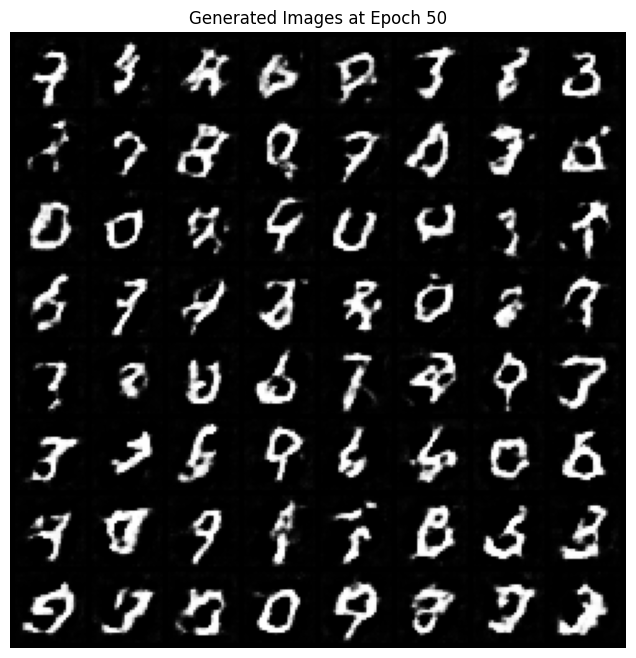

In [8]:
epochs = 50
losses_g, losses_d = [], []

# Function to visualize generated images at specific intervals
def show_generated_images(epoch):
    noise = torch.randn(64, latent_dim, 1, 1).to(device)
    fake_images = generator(noise)
    show_images(fake_images, f"Generated Images at Epoch {epoch + 1}")

for epoch in range(epochs):
    loss_g_epoch = 0
    loss_d_epoch = 0
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim, 1, 1).to(device)
        fake_imgs = generator(z)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        loss_d = real_loss + fake_loss
        loss_d.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_loss = criterion(discriminator(fake_imgs), real_labels)
        gen_loss.backward()
        optimizer_G.step()

        loss_g_epoch += gen_loss.item()
        loss_d_epoch += loss_d.item()

    losses_g.append(loss_g_epoch / len(dataloader))
    losses_d.append(loss_d_epoch / len(dataloader))
    print(f"Epoch [{epoch+1}/{epochs}] | Loss_D: {loss_d_epoch:.4f} | Loss_G: {loss_g_epoch:.4f}")

    # Show generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        show_generated_images(epoch)


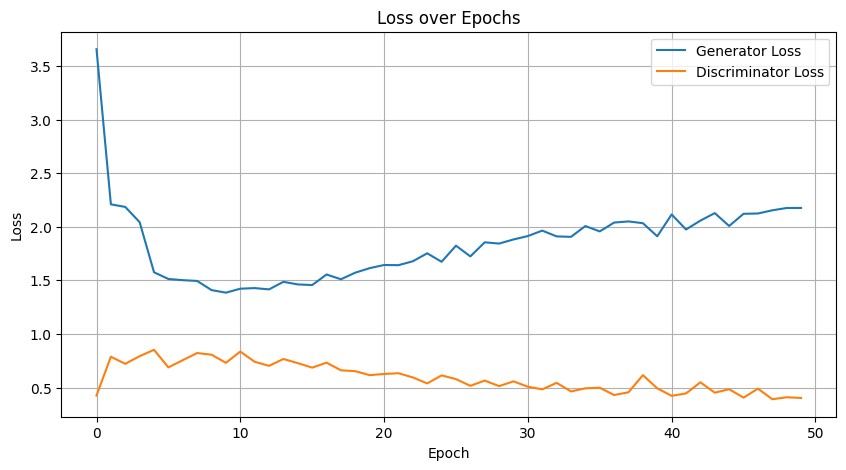

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(losses_g, label="Generator Loss")
plt.plot(losses_d, label="Discriminator Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


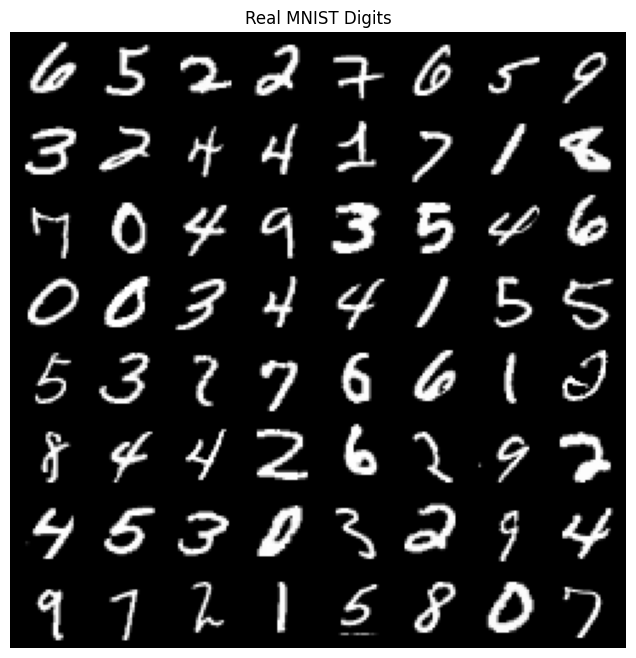

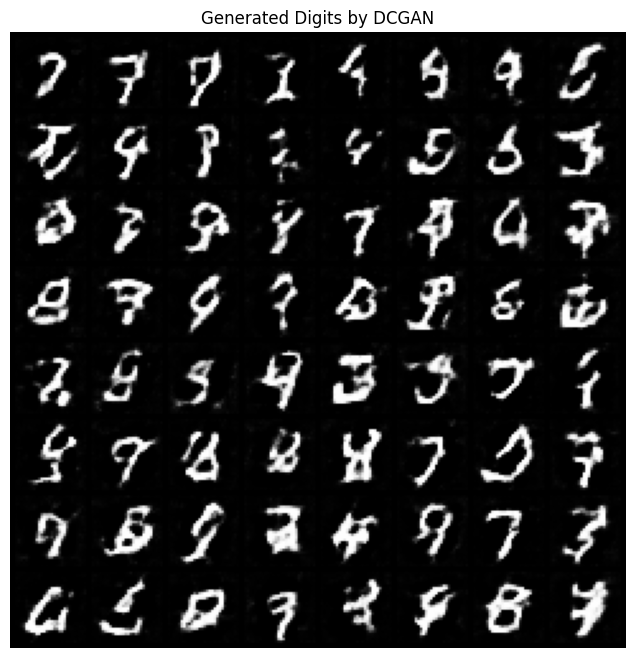

In [11]:

# Real samples
real_batch = next(iter(dataloader))[0][:64]
show_images(real_batch, "Real MNIST Digits")

# Fake samples
noise = torch.randn(64, latent_dim, 1, 1).to(device)
fake_batch = generator(noise)
show_images(fake_batch, "Generated Digits by DCGAN")
